In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/drive/My Drive/CS/CC GENERAL.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Dataset Overview:")
print(data.head())


Dataset Overview:
  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                 

In [5]:
# Drop irrelevant columns (e.g., 'CUST_ID' if present)
if 'CUST_ID' in data.columns:
    data = data.drop(columns=['CUST_ID'])

# Check for missing values again
missing_values = data.isnull().sum()
print("Missing Values After Dropping 'CUST_ID':")
print(missing_values[missing_values > 0])

# Fill missing values with the column mean
data.fillna(data.mean(), inplace=True)

# Verify no missing values remain
print("Missing Values After Imputation:")
print(data.isnull().sum())


Missing Values After Dropping 'CUST_ID':
CREDIT_LIMIT          1
MINIMUM_PAYMENTS    313
dtype: int64
Missing Values After Imputation:
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


In [6]:
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

print("Data has been standardized.")


Data has been standardized.


Number of principal components retained: 12


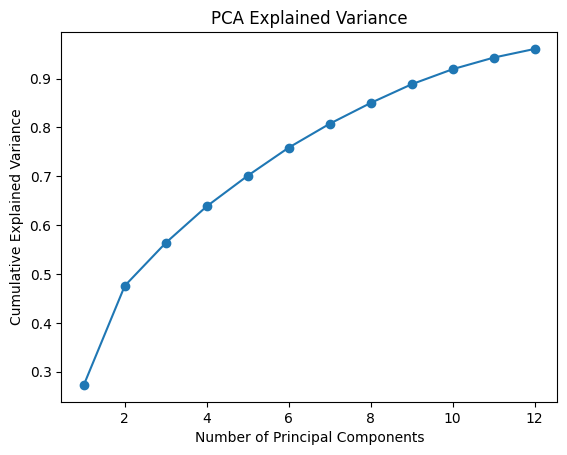

In [7]:
from sklearn.decomposition import PCA

# Apply PCA to retain 95% of variance
pca = PCA(n_components=0.95)
pca_data = pca.fit_transform(scaled_data)

print(f"Number of principal components retained: {pca.n_components_}")

# Visualize explained variance
explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.show()


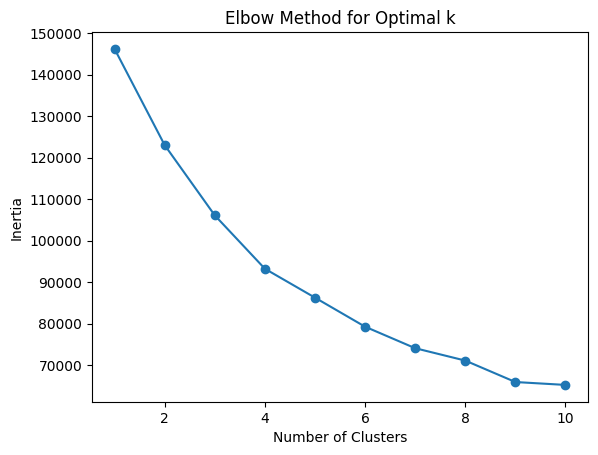

Silhouette Score for k=4: 0.21186234699652323


In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Determine optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Fit K-Means with optimal number of clusters (e.g., k=4)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(pca_data)

# Add cluster labels to the dataset
data['Cluster'] = clusters

print(f"Silhouette Score for k={optimal_k}: {silhouette_score(pca_data, clusters)}")


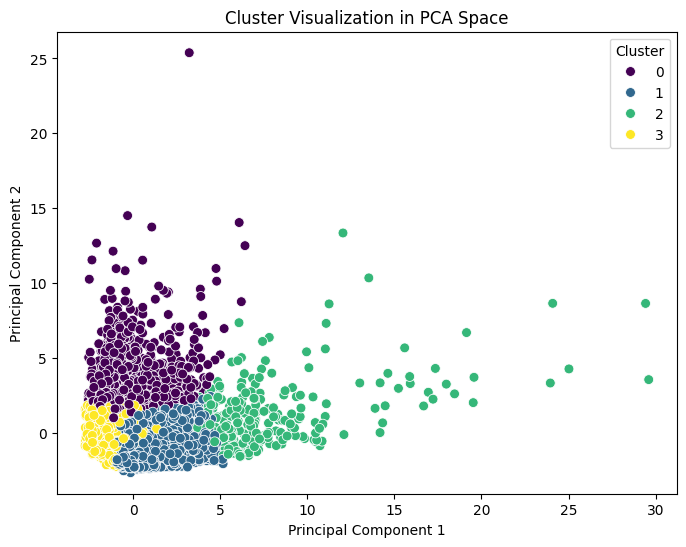

In [9]:
# Visualize clusters
pca_df = pd.DataFrame(pca_data, columns=[f'PC{i+1}' for i in range(pca_data.shape[1])])
pca_df['Cluster'] = clusters

plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='viridis', s=50)
plt.title('Cluster Visualization in PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


Cluster Profiles:
             BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
Cluster                                                                  
0        4591.560169           0.968516   527.716714        338.849983   
1         974.577421           0.941373  1376.263885        689.087277   
2        4046.163699           0.985380  9409.135448       6299.801493   
3         998.752305           0.788765   273.032893        208.551081   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Cluster                                                              
0                    188.951104   4518.932440             0.288784   
1                    687.358888    221.342201             0.893509   
2                   3111.572761    677.635390             0.945155   
3                     64.817647    586.437472             0.179262   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
Cluster                                    

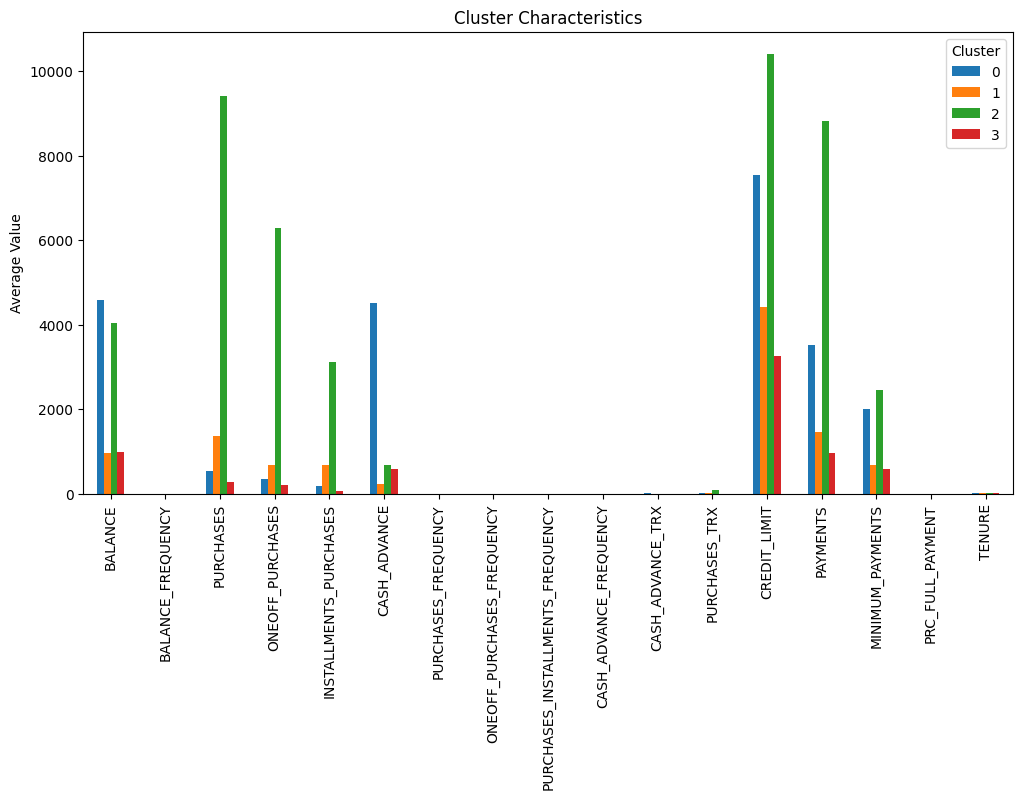

In [10]:
cluster_summary = data.groupby('Cluster').mean()
print("Cluster Profiles:")
print(cluster_summary)

# Visualize cluster profiles
cluster_summary.T.plot(kind='bar', figsize=(12, 6), legend=True)
plt.title('Cluster Characteristics')
plt.ylabel('Average Value')
plt.show()


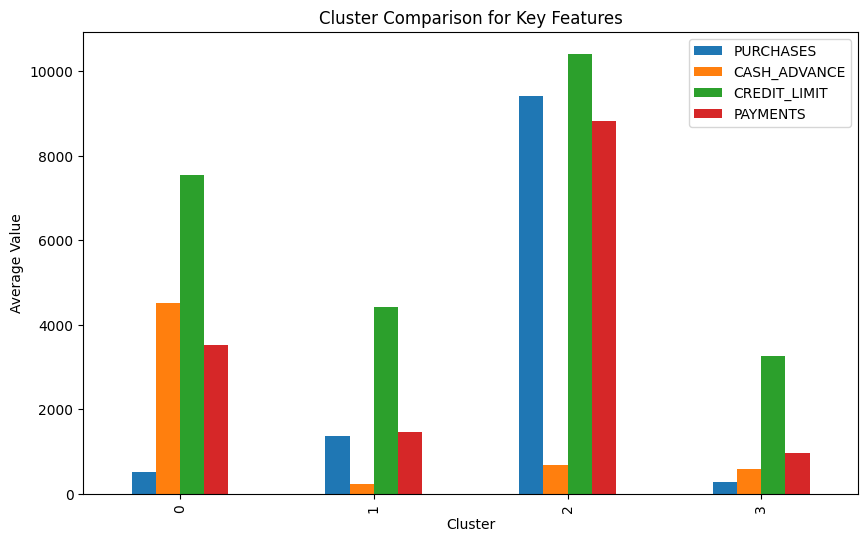

In [11]:
# Visualize cluster differences for selected features
features_to_compare = ['PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS']
cluster_summary = data.groupby('Cluster')[features_to_compare].mean()

cluster_summary.plot(kind='bar', figsize=(10, 6), legend=True)
plt.title('Cluster Comparison for Key Features')
plt.ylabel('Average Value')
plt.show()


In [12]:
print("Cluster Sizes:")
print(data['Cluster'].value_counts())


Cluster Sizes:
Cluster
3    4051
1    3426
0    1205
2     268
Name: count, dtype: int64


In [14]:
# Ensure the correct number of columns matches the PCA components
pca_components = pd.DataFrame(pca.components_, columns=data.drop(columns=['Cluster']).columns)
print("PCA Components:")
print(pca_components)


PCA Components:
     BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0   0.101077           0.120043   0.411642          0.346407   
1   0.403957           0.130537   0.041038          0.062872   
2   0.160075           0.420630  -0.257903         -0.392115   
3   0.283454           0.149742   0.039111          0.078155   
4  -0.047603           0.484563  -0.031287          0.155846   
5  -0.039897          -0.035317  -0.176295         -0.184610   
6   0.252376          -0.104751  -0.203290         -0.121706   
7  -0.169446           0.258930   0.019794          0.125738   
8   0.130322           0.621381   0.105111          0.018085   
9  -0.030909           0.081380  -0.051208          0.175634   
10  0.146699          -0.118715   0.200909          0.447872   
11  0.480161          -0.096074  -0.075423          0.052596   

    INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                 0.336814     -0.023343             0.321493   
1                -0.0

In [15]:
original_features = data.columns[:-1]  # Exclude 'Cluster' or any other extra columns
pca_components = pd.DataFrame(pca.components_, columns=original_features)


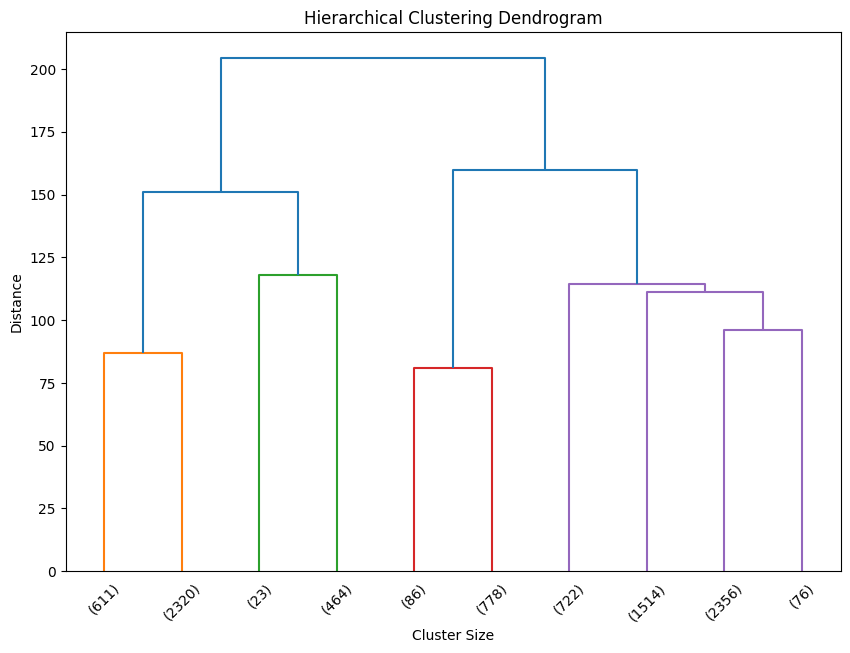

Hierarchical Clustering Applied. Clusters Added to Data.


In [17]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Perform hierarchical clustering and generate the dendrogram
linked = linkage(scaled_data, method='ward')  # 'ward' minimizes variance within clusters

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='lastp', p=10, leaf_rotation=45, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()

# Fit Agglomerative Clustering with a fixed number of clusters
n_clusters = 4  # Choose based on the dendrogram
hierarchical = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
hierarchical_clusters = hierarchical.fit_predict(scaled_data)

# Add cluster labels to the dataset
data['Hierarchical_Cluster'] = hierarchical_clusters
print("Hierarchical Clustering Applied. Clusters Added to Data.")
